In [14]:
import time
import urllib.request

def download_url(url, save_as):
    response = urllib.request.urlopen(url)
    data = response.read()
    file = open(save_as, 'wb')
    file.write(data)
    file.close()
    response.close()
    
def read_binary_file(file):
    f = open(file,'rb')
    block = f.read()
    return block.decode('utf-16')

def split_text_in_lines(text):
    return text.split('\r\n')

def split_by_tabs(line):
    return line.split('\t')

In [15]:
names_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.names'
data_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.data'
diagnosis_names = 'diagnosis.names'
diagnosis_data = 'diagnosis.data'
download_url(names_link, diagnosis_names)
download_url(data_link, diagnosis_data)

In [16]:
start_time = time.time()
import numpy as np

def parse_double(field):
    field = field.replace(',', '.')
    return float(field)

def parse_boolean(field):
    return 1. if field == 'yes' else 0.

def read_np_array(file = diagnosis_data):
    text = read_binary_file(file)
    lines = split_text_in_lines(text)
    rows = []
    for line in lines:
        if line == '': continue
        line = line.replace('\r\n', '')
        fields = split_by_tabs(line)
        row = []
        j = 0
        for field in fields:
            value = parse_double(field) if j == 0 else parse_boolean(field)
            row.append(value)
            j += 1
        rows.append(row)
    matrix = np.array(rows, dtype = np.float32)
    return matrix

In [17]:
def get_random_indexes(n):
    indexes = list(range(n))
    random_indexes = []
    for i in range(n):
        r = np.random.randint(len(indexes))
        random_indexes.append(indexes.pop(r))
    return random_indexes

def get_indexes_for_2_datasets(n, training = 80):
    indexes = get_random_indexes(n)
    train = int(training / 100. * n)
    return indexes[:train], indexes[train:]

matrix = read_np_array()
n_samples, n_dimensions = matrix.shape

train_indexes, test_indexes = get_indexes_for_2_datasets(n_samples)
train_data = matrix[train_indexes]
test_data = matrix[test_indexes]

def print_dataset(name, data):
    print('Dataset {}. Shape: {}'.format(name, data.shape))
    print(data)

In [18]:
print_dataset('Train', train_data)

Dataset Train. Shape: (96, 8)
[[36.7  0.   1.   0.   0.   0.   0.   0. ]
 [37.6  0.   0.   1.   1.   0.   1.   0. ]
 [37.6  0.   0.   1.   1.   1.   1.   0. ]
 [39.7  0.   1.   1.   0.   1.   0.   1. ]
 [37.9  0.   0.   1.   1.   0.   1.   0. ]
 [41.5  0.   1.   1.   0.   1.   0.   1. ]
 [36.7  0.   0.   1.   1.   1.   1.   0. ]
 [37.9  0.   0.   1.   0.   0.   1.   0. ]
 [35.5  0.   1.   0.   0.   0.   0.   0. ]
 [35.9  0.   1.   0.   0.   0.   0.   0. ]
 [37.3  0.   0.   1.   1.   1.   1.   0. ]
 [37.2  0.   0.   1.   1.   0.   1.   0. ]
 [38.3  0.   1.   1.   0.   1.   0.   1. ]
 [37.   0.   0.   1.   1.   1.   1.   0. ]
 [37.2  0.   1.   0.   0.   0.   0.   0. ]
 [40.4  1.   1.   1.   1.   0.   1.   1. ]
 [40.4  1.   1.   0.   1.   0.   0.   1. ]
 [37.4  0.   1.   0.   0.   0.   0.   0. ]
 [40.   1.   1.   1.   1.   1.   1.   1. ]
 [36.6  0.   1.   0.   0.   0.   0.   0. ]
 [40.2  1.   1.   0.   1.   0.   0.   1. ]
 [40.2  0.   0.   0.   0.   0.   0.   0. ]
 [36.7  0.   1.   0.   0

In [19]:
print_dataset('Test', test_data)

Dataset Test. Shape: (24, 8)
[[37.1  0.   0.   1.   1.   1.   1.   0. ]
 [37.5  0.   0.   1.   0.   0.   1.   0. ]
 [41.   0.   1.   1.   0.   1.   0.   1. ]
 [40.2  1.   1.   1.   1.   1.   1.   1. ]
 [37.6  0.   0.   1.   1.   0.   1.   0. ]
 [37.8  0.   0.   1.   1.   1.   1.   0. ]
 [37.5  0.   0.   1.   0.   0.   1.   0. ]
 [38.5  0.   1.   1.   0.   1.   0.   1. ]
 [36.6  0.   1.   0.   0.   0.   0.   0. ]
 [40.   0.   1.   1.   0.   1.   0.   1. ]
 [40.7  1.   1.   1.   1.   1.   1.   1. ]
 [40.9  0.   1.   1.   0.   1.   0.   1. ]
 [40.7  0.   1.   1.   0.   1.   0.   1. ]
 [41.   1.   1.   0.   1.   0.   0.   1. ]
 [40.   1.   1.   0.   1.   0.   0.   1. ]
 [41.1  0.   0.   0.   0.   0.   0.   0. ]
 [40.6  1.   1.   1.   1.   1.   1.   1. ]
 [37.1  0.   1.   0.   0.   0.   0.   0. ]
 [36.6  0.   0.   1.   1.   1.   1.   0. ]
 [39.4  0.   1.   1.   0.   1.   0.   1. ]
 [41.1  1.   1.   1.   1.   1.   1.   1. ]
 [40.9  1.   1.   1.   1.   0.   1.   1. ]
 [40.7  0.   0.   0.   0.

In [20]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

input_size = 6
learning_rate = 0.01
num_iterations = 20000

class LogisticRegression(torch.nn.Module):

    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [21]:
def decide(y):
    return 1. if y >= 0.5 else 0.

decide_vectorized = np.vectorize(decide)

to_percent = lambda x: '{:.2f}%'.format(x)

def compute_accuracy(model, input, output):
    prediction = model(input).data.numpy()[:, 0]
    n_samples = prediction.shape[0] + 0.
    prediction = decide_vectorized(prediction)
    equal = prediction == output.data.numpy()
    return 100. * equal.sum() / n_samples

def get_input_and_output(data):
    input = Variable(torch.tensor(data[:, :6], dtype = torch.float32))
    output1 = Variable(torch.tensor(data[:, 6], dtype = torch.float32))
    output2 = Variable(torch.tensor(data[:, 7], dtype = torch.float32))
    return input, output1, output2

input, output1, output2 = get_input_and_output(train_data)
test_input, test_output1, test_output2 = get_input_and_output(test_data)

import matplotlib.pyplot as plt
%matplotlib inline

diagnosis_title1 = 'Inflammation of Urinary Bladder'
diagnosis_title2 = 'Nephritis of Renal Pelvis Origin'

def plot_graphs(diagnosis_title, losses, accuracies):
    plt.plot(losses)
    plt.title(f"{diagnosis_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    plt.plot(accuracies)
    plt.title(f"{diagnosis_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()
    
def train_model(diagnosis_title, input, output, test_input, test_output):
    model = LogisticRegression()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
    losses = []
    accuracies = []
    n_samples, _ = input.shape
    for iteration in range(num_iterations):
            optimizer.zero_grad()
            prediction = model(input)
            loss = criterion(prediction.view(-1), output)
            loss.backward()
            optimizer.step()
            if iteration % 500 == 0:
                train_acc = compute_accuracy(model, input, output)
                train_loss = loss.item()
                losses.append(train_loss)
                accuracies.append(train_acc)
                print('iteration={}, loss={:.4f}, train_acc={}'.format(iteration, train_loss, to_percent(train_acc)))
    plot_graphs(diagnosis_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model


iteration=0, loss=1.5405, train_acc=48.96%


c:\Users\AMRITA VARIER\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


iteration=500, loss=1.3859, train_acc=48.96%
iteration=1000, loss=0.7811, train_acc=67.71%
iteration=1500, loss=0.1883, train_acc=100.00%
iteration=2000, loss=0.1668, train_acc=100.00%
iteration=2500, loss=0.1510, train_acc=100.00%
iteration=3000, loss=0.1382, train_acc=100.00%
iteration=3500, loss=0.1275, train_acc=100.00%
iteration=4000, loss=0.1184, train_acc=100.00%
iteration=4500, loss=0.1106, train_acc=100.00%
iteration=5000, loss=0.1038, train_acc=100.00%
iteration=5500, loss=0.0978, train_acc=100.00%
iteration=6000, loss=0.0925, train_acc=100.00%
iteration=6500, loss=0.0877, train_acc=100.00%
iteration=7000, loss=0.0835, train_acc=100.00%
iteration=7500, loss=0.0796, train_acc=100.00%
iteration=8000, loss=0.0761, train_acc=100.00%
iteration=8500, loss=0.0729, train_acc=100.00%
iteration=9000, loss=0.0699, train_acc=100.00%
iteration=9500, loss=0.0672, train_acc=100.00%
iteration=10000, loss=0.0647, train_acc=100.00%
iteration=10500, loss=0.0624, train_acc=100.00%
iteration=1100

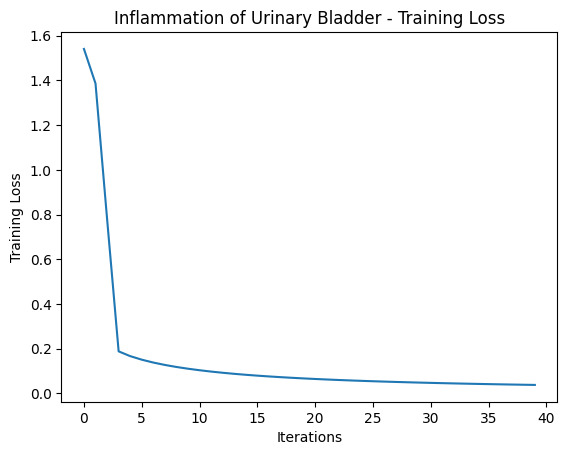

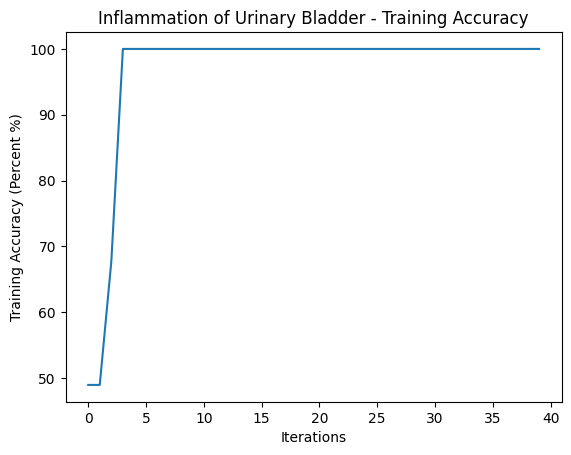


Testing Accuracy = 100.00%


In [22]:
model = train_model(diagnosis_title1, input, output1, test_input, test_output1)

iteration=0, loss=3.6616, train_acc=61.46%
iteration=500, loss=0.7092, train_acc=61.46%
iteration=1000, loss=0.7715, train_acc=61.46%
iteration=1500, loss=0.6735, train_acc=61.46%
iteration=2000, loss=0.4967, train_acc=66.67%
iteration=2500, loss=0.2077, train_acc=100.00%
iteration=3000, loss=0.1852, train_acc=100.00%
iteration=3500, loss=0.1721, train_acc=100.00%
iteration=4000, loss=0.1609, train_acc=100.00%
iteration=4500, loss=0.1511, train_acc=100.00%
iteration=5000, loss=0.1426, train_acc=100.00%
iteration=5500, loss=0.1349, train_acc=100.00%
iteration=6000, loss=0.1281, train_acc=100.00%
iteration=6500, loss=0.1220, train_acc=100.00%
iteration=7000, loss=0.1165, train_acc=100.00%
iteration=7500, loss=0.1114, train_acc=100.00%
iteration=8000, loss=0.1068, train_acc=100.00%
iteration=8500, loss=0.1026, train_acc=100.00%
iteration=9000, loss=0.0987, train_acc=100.00%
iteration=9500, loss=0.0951, train_acc=100.00%
iteration=10000, loss=0.0918, train_acc=100.00%
iteration=10500, loss

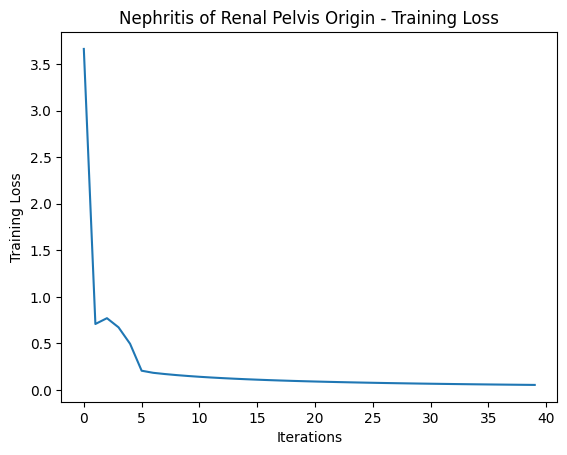

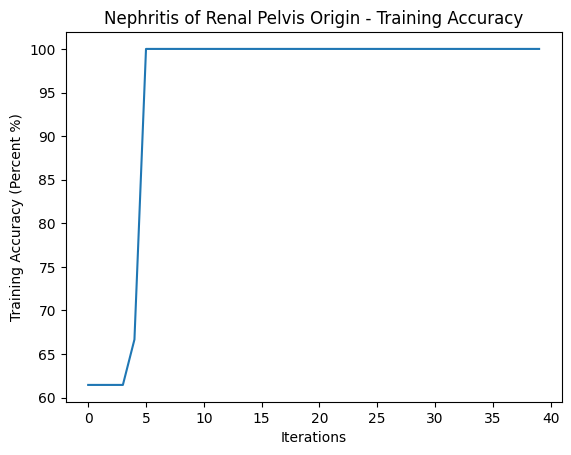


Testing Accuracy = 100.00%


In [23]:
model = train_model(diagnosis_title2, input, output2, test_input, test_output2)

In [24]:
end_time = time.time()
print("Process finished --- %s seconds ---" % (time.time() - start_time))

Process finished --- 15.314121961593628 seconds ---
